In [1]:
import cv2
import matplotlib.pyplot as plt
import os
import sys
import numpy as np

sys.path.append(os.path.dirname(os.path.abspath(os.path.dirname("hong"))))

import warnings
warnings.filterwarnings('ignore')

(720, 1280, 3)


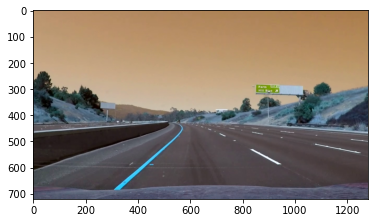

In [17]:
path = r"C:\Users\master\Desktop\git\auto\hong\test1.png"
img = cv2.imread(path)
print(img.shape)
img_h, img_w = img.shape[:-1]
plt.imshow(img)

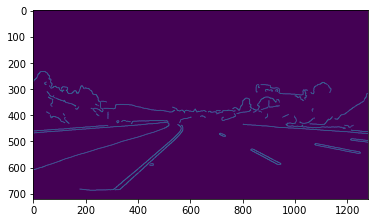

In [5]:
from utils import edge_dec, hough_lines_detection

# perform edge detection
img_edge = edge_dec(img)
plt.imshow(img_edge*255)

In [6]:
detected_lines = hough_lines_detection(img=img_edge,
                                       rho=2,
                                       theta=np.pi / 180,
                                       threshold=1,
                                       min_line_len=15,
                                       max_line_gap=5)

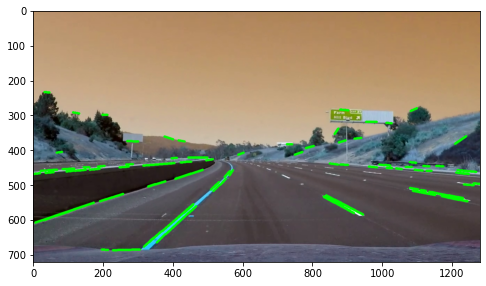

In [7]:
img_c = img.copy()
for line in detected_lines:
    x1,y1,x2,y2 = line[0]
    cv2.line(img_c,(x1,y1),(x2,y2),(0,255,0),5)
plt.figure(figsize=(8,8))
plt.imshow(img_c)
plt.show()

In [10]:
from utils import Line
detected_lines = [Line(l[0][0], l[0][1], l[0][2], l[0][3]) for l in detected_lines]

In [11]:
line_img = np.zeros(shape=(img_h, img_w))
for lane in detected_lines:
    lane.draw(line_img)

In [13]:
from utils import compute_lane_from_candidates
candidate_lines = []
for line in detected_lines:
    # consider only lines with slope between 30 and 60 degrees
    if 0.5 <= np.abs(line.slope) <= 2:
        candidate_lines.append(line)

lane_lines = compute_lane_from_candidates(candidate_lines, img_edge.shape)

In [15]:
line_img = np.zeros(shape=(img_h, img_w))
for lane in lane_lines:
    lane.draw(line_img)

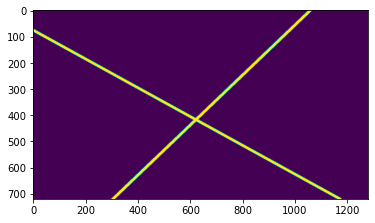

In [16]:
plt.imshow(line_img)

In [29]:
line_img.shape, mask.shape

((720, 1280), (720, 1280, 3))

In [30]:
# Set Region
region = np.array([
    [(100, img_h), (1180, img_h), (img_w / 2, img_h / 2)]
], dtype = np.int32) # dtype = np.int32 for fillPoly error

# Apply Mask to the Image
mask = np.zeros_like(line_img)
cv2.fillPoly(mask, region, 255)
masked_img = cv2.bitwise_and(line_img, mask)

<AxesSubplot:ylabel='Density'>

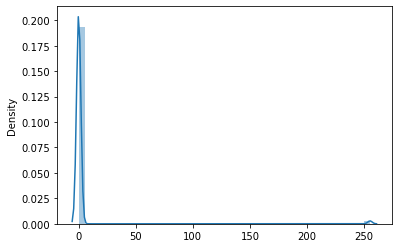

In [31]:
import seaborn as sns

sns.distplot(masked_img.flatten())

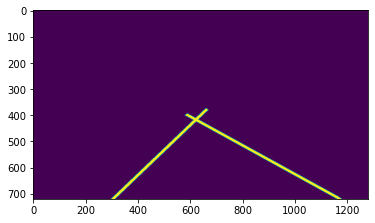

In [32]:
plt.imshow(masked_img*255)

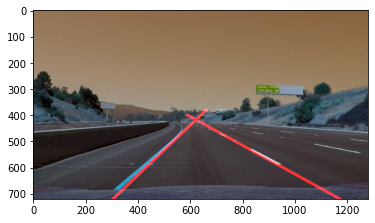

In [37]:
from utils import weighted_img
img_blend = weighted_img(masked_img, img, α=0.8, β=1., λ=0.)
plt.imshow(img_blend)